# Revature Project 2 : 

### Spark Dataframe and SQL:

    - Data cleaning
    - Create dataframe using spark dataframe
    - Create database using spark sql
    - Required view
    - Query : 
            - Name of query
            - Syntax
            - Output
            - Analysis/Understanding
    - 

In [19]:
import pandas as pd
import numpy as np
import pandas_profiling as pf
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("G:\Revature Training\Projects\Project_2\Dataset\employeeburndataset.csv")
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52


In [37]:
df.shape

(22750, 9)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [39]:
def showrel(df):
    d = pd.DataFrame(columns=['Column_name','NA_count','NA_count_Per','NA_Average','NA_Avg_Per'])
    Column_name,NA_count,NA_count_per,NA_Average,NA_Avg_Per= [],[],[],[],[]
    for j in df.columns:
        Column_name.append(j)
        NA_count.append(df[j].isna().sum())
        NA_count_per.append(((df[j].isna().sum())/len(df))*100)
        
        NA_Average.append(round(df[j].isna().mean(),2))
        NA_Avg_Per.append(round(df[j].isna().mean()*100,2))
    d['Column_name'],d['NA_count'],d['NA_count_Per'],d['NA_Average'],d['NA_Avg_Per'] = Column_name,NA_count,NA_count_per,NA_Average,NA_Avg_Per
    d.to_csv('G:\Revature Training\Projects\Project_2\Dataset\missingdata.csv',index=True)
    return d

In [40]:
showrel(df)

,Column_name,NA_count,NA_count_Per,NA_Average,NA_Avg_Per
0,Employee ID,0,0.000000,0.00,0.00
1,Date of Joining,0,0.000000,0.00,0.00
2,Gender,0,0.000000,0.00,0.00
3,Company Type,0,0.000000,0.00,0.00
4,WFH Setup Available,0,0.000000,0.00,0.00
5,Designation,0,0.000000,0.00,0.00
6,Resource Allocation,1381,6.070330,0.06,6.07
7,Mental Fatigue Score,2117,9.305495,0.09,9.31
8,Burn Rate,1124,4.940659,0.05,4.94


In [41]:
report = pf.ProfileReport(df)

In [42]:
report.to_file(output_file="G:\Revature Training\Projects\Project_2\Report\project2eport.html")

In [26]:
df['Resource Allocation'].value_counts()

4.0     3893
5.0     3861
3.0     3192
6.0     2943
2.0     2075
7.0     1965
1.0     1791
8.0     1044
9.0      446
10.0     159
Name: Resource Allocation, dtype: int64

def RSI(df,variable):#,median):
    #df[variable+'_median'] = df[variable].fillna(median)#replace Nan with median
    df[variable+'_random'] = df[variable]#Copy feature into new feature
    #calculate random smaple and store into random_sample_values
    random_sample_value = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #in random_sample_value all filled nan values are present now we want to put/merge this all filled values in our dataset
    # for this we want to match all nan values index in random_sample_values with df[variavle_'random] 
    #Pandas need to have same index in order to merge dataset
    random_sample_value.index = df[df[variable].isnull()].index#find index of NaN values in feature
    #now put a condition where ever it is null with loc function then replace with random_sample_values
    df.loc[df[variable].isnull(),variable+'_random'] =random_sample_value

In [13]:
def RSI(df,variable):#,median):
    df[variable] = df[variable]#Copy feature into new feature
    #calculate random smaple and store into random_sample_values
    random_sample_value = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #in random_sample_value all filled nan values are present now we want to put/merge this all filled values in our dataset
    # for this we want to match all nan values index in random_sample_values with df[variavle_'random] 
    #Pandas need to have same index in order to merge dataset
    random_sample_value.index = df[df[variable].isnull()].index#find index of NaN values in feature
    #now put a condition where ever it is null with loc function then replace with random_sample_values
    df.loc[df[variable].isnull(),variable] =random_sample_value

In [14]:
for i in df.columns[df.isnull().any()]:
    RSI(df,i)

<AxesSubplot:ylabel='Density'>

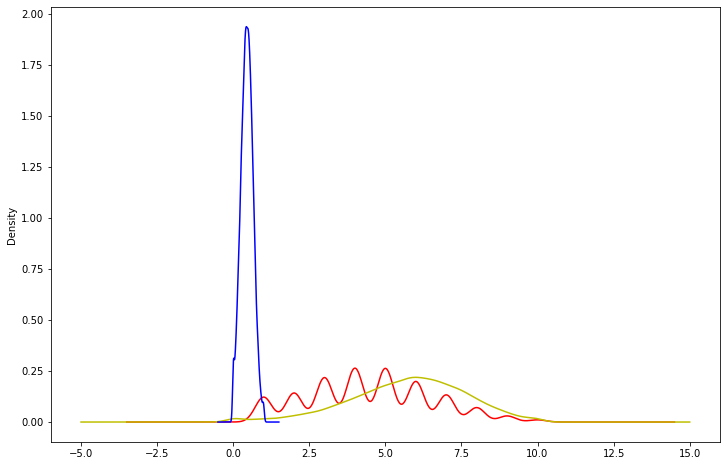

In [15]:
plt.figure(figsize=(12,8))
df['Resource Allocation'].plot(kind='kde',color='r')
df['Mental Fatigue Score'].plot(kind='kde',color='y')
df['Burn Rate'].plot(kind='kde',color='b')

In [16]:
df.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [95]:
df.to_csv("Project_2_dataset.csv")